In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
car=pd.read_csv("Used Cars.csv")

In [3]:
car

,brand,model,year,mileage,transmission,fuel_type,price
0,HYUNDAI,I10,2016,139999,Manual,Gasoline,75000
1,VOLKSWAGEN,Jetta,2015,299999,Automatic,Diesel,130000
2,SKODA,Karoq,2020,159999,Automatic,Diesel,250000
3,HYUNDAI,Santa fe,2012,189999,Automatic,Diesel,125000
4,VOLKSWAGEN,Jetta,2017,249999,Automatic,Diesel,150000
...,...,...,...,...,...,...,...
7900,DACIA,Duster,2022,94999,Manual,Diesel,165000
7901,FORD,Fiesta,2010,149999,Manual,Gasoline,65000
7902,SEAT,Ateca,2021,109999,Automatic,Diesel,265000
7903,VOLKSWAGEN,Touareg,2016,249999,Automatic,Diesel,180000


In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         7905 non-null   object
 1   model         7905 non-null   object
 2   year          7905 non-null   int64 
 3   mileage       7905 non-null   int64 
 4   transmission  7905 non-null   object
 5   fuel_type     7905 non-null   object
 6   price         7905 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 432.4+ KB


In [5]:
car.dtypes

brand           object
model           object
year             int64
mileage          int64
transmission    object
fuel_type       object
price            int64
dtype: object

In [6]:
car.head()

,brand,model,year,mileage,transmission,fuel_type,price
0,HYUNDAI,I10,2016,139999,Manual,Gasoline,75000
1,VOLKSWAGEN,Jetta,2015,299999,Automatic,Diesel,130000
2,SKODA,Karoq,2020,159999,Automatic,Diesel,250000
3,HYUNDAI,Santa fe,2012,189999,Automatic,Diesel,125000
4,VOLKSWAGEN,Jetta,2017,249999,Automatic,Diesel,150000


In [7]:
car.tail()

,brand,model,year,mileage,transmission,fuel_type,price
7900,DACIA,Duster,2022,94999,Manual,Diesel,165000
7901,FORD,Fiesta,2010,149999,Manual,Gasoline,65000
7902,SEAT,Ateca,2021,109999,Automatic,Diesel,265000
7903,VOLKSWAGEN,Touareg,2016,249999,Automatic,Diesel,180000
7904,OPEL,Crossland,2021,129999,Manual,Diesel,160000


In [8]:
car.describe()

,year,mileage,price
count,7905.000000,7905.000000,7905.000000
mean,2017.371537,129690.334598,204338.393422
std,5.829930,84776.100426,101109.632920
min,1981.000000,4999.000000,45000.000000
25%,2015.000000,69999.000000,125000.000000
50%,2019.000000,119999.000000,180000.000000
75%,2021.000000,169999.000000,280000.000000
max,2025.000000,499999.000000,460000.000000


In [9]:
car.isnull().sum()

brand           0
model           0
year            0
mileage         0
transmission    0
fuel_type       0
price           0
dtype: int64

In [10]:
car["transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [11]:
car["fuel_type"].unique()

array(['Gasoline', 'Diesel', 'Hybrid'], dtype=object)

In [12]:
car.columns

Index(['brand', 'model', 'year', 'mileage', 'transmission', 'fuel_type',
       'price'],
      dtype='object')

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
car["brand"]=le.fit_transform(car["brand"])
car["model"]=le.fit_transform(car["model"])
car["transmission"]=le.fit_transform(car["transmission"])
car["fuel_type"]=le.fit_transform(car["fuel_type"])

In [14]:
car

,brand,model,year,mileage,transmission,fuel_type,price
0,27,247,2016,139999,1,1,75000
1,66,260,2015,299999,0,0,130000
2,59,275,2020,159999,0,0,250000
3,27,370,2012,189999,0,0,125000
4,66,260,2017,249999,0,0,150000
...,...,...,...,...,...,...,...
7900,14,185,2022,94999,1,0,165000
7901,20,205,2010,149999,1,1,65000
7902,57,80,2021,109999,0,0,265000
7903,66,417,2016,249999,0,0,180000


In [62]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Loop through all columns
for col in car.columns:
    print(f"\n🔍 Column: {col}")
    
    # Check if column is numeric
    if pd.api.types.is_numeric_dtype(car[col]):
        data = car[col].dropna()  # Remove missing values
        col_skew = skew(data)
        col_kurt = kurtosis(data)
        
        print(f"Skewness : {col_skew:.2f}")
        print(f"Kurtosis: {col_kurt:.2f}")
    else:
        print("⛔ Not a numeric column. Skewness and kurtosis not applicable.")



🔍 Column: brand
Skewness : -0.22
Kurtosis: -1.24

🔍 Column: model
Skewness : -0.07
Kurtosis: -1.24

🔍 Column: year
Skewness : -1.70
Kurtosis: 4.41

🔍 Column: mileage
Skewness : 0.99
Kurtosis: 1.44

🔍 Column: transmission
Skewness : 0.27
Kurtosis: -1.93

🔍 Column: fuel_type
Skewness : 2.39
Kurtosis: 5.03

🔍 Column: price
Skewness : 0.53
Kurtosis: -0.70


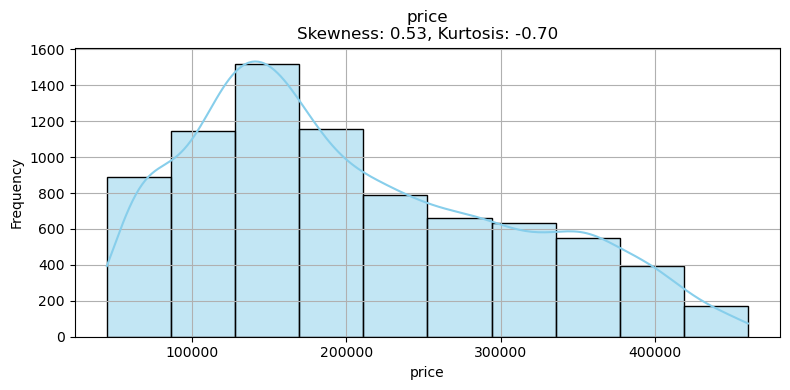

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example data (you must define `data`, `col`, `col_skew`, `col_kurt` before this)
# This block assumes it's inside a loop or function where those are defined

plt.figure(figsize=(8, 4))
sns.histplot(data, kde=True, bins=10, color="skyblue", edgecolor="black")
plt.title(f"{col}\nSkewness: {col_skew:.2f}, Kurtosis: {col_kurt:.2f}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


# outlier analysis

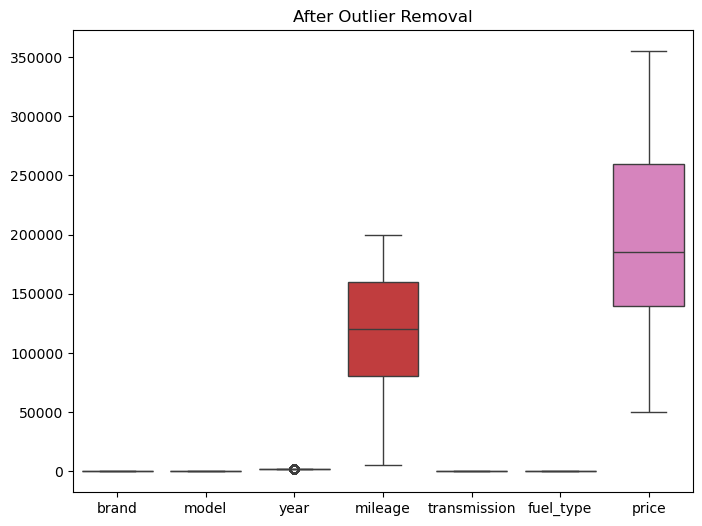

In [64]:
import pandas as pd
numeric_cols=car.select_dtypes(include="number").columns

car_clean=car.copy()
for col in numeric_cols:
    Q1=car[col].quantile(0.25)
    Q3=car[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q1+1.5*IQR
    car_clean=car_clean[(car_clean[col]>=lower_bound)&(car_clean[col]<=upper_bound)]

plt.figure(figsize=(8,6))
sns.boxplot(data=car_clean)
plt.title("After Outlier Removal")
plt.show()



In [65]:
car_clean

,brand,model,year,mileage,transmission,fuel_type,price
2,59,275,2020,159999,0,0,250000
3,27,370,2012,189999,0,0,125000
5,54,150,2021,64999,1,0,150000
7,51,18,2023,89999,1,0,145000
9,50,162,2022,49999,1,0,155000
...,...,...,...,...,...,...,...
7896,36,354,2016,139999,0,0,310000
7898,12,104,2024,14999,1,0,195000
7900,14,185,2022,94999,1,0,165000
7902,57,80,2021,109999,0,0,265000


In [66]:
x=car.iloc[:,:-1]
y=car.iloc[:,-1]

In [67]:
x

,brand,model,year,mileage,transmission,fuel_type
0,27,247,2016,139999,1,1
1,66,260,2015,299999,0,0
2,59,275,2020,159999,0,0
3,27,370,2012,189999,0,0
4,66,260,2017,249999,0,0
...,...,...,...,...,...,...
7900,14,185,2022,94999,1,0
7901,20,205,2010,149999,1,1
7902,57,80,2021,109999,0,0
7903,66,417,2016,249999,0,0


In [68]:
y

0        75000
1       130000
2       250000
3       125000
4       150000
         ...  
7900    165000
7901     65000
7902    265000
7903    180000
7904    160000
Name: price, Length: 7905, dtype: int64

In [69]:
from sklearn.preprocessing import RobustScaler

# Select only numeric columns from the DataFrame
numeric_cols = car.select_dtypes(include=["int64", "float64"]).columns

# Prepare the data (only numeric columns)
x = car[numeric_cols]

# Initialize the scaler
scaler = RobustScaler()

# Fit and transform the numeric data
scaled_data = scaler.fit_transform(x)

# If you want, convert back to DataFrame with the same column names
scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols)

print(scaled_df.head())


       year  mileage     price
0 -0.500000      0.2 -0.677419
1 -0.666667      1.8 -0.322581
2  0.166667      0.4  0.451613
3 -1.166667      0.7 -0.354839
4 -0.333333      1.3 -0.193548


In [70]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
scaled_data=scaler.fit_transform(x)
scaled_data

array([[-0.5       ,  0.2       , -0.67741935],
       [-0.66666667,  1.8       , -0.32258065],
       [ 0.16666667,  0.4       ,  0.4516129 ],
       ...,
       [ 0.33333333, -0.1       ,  0.5483871 ],
       [-0.5       ,  1.3       ,  0.        ],
       [ 0.33333333,  0.1       , -0.12903226]])

In [71]:
model2=LinearRegression()

In [72]:
model2.fit(x,y)

LinearRegression()

In [73]:
y_pred2 = model2.predict(x) 
print(y_pred2)

[ 75000. 130000. 250000. ... 265000. 180000. 160000.]


In [74]:
print("intercept:",model2.intercept_)

intercept: -2.9103830456733704e-11


In [75]:
print("slope:",model2.coef_)

slope: [-4.47138773e-14  3.76630411e-16  1.00000000e+00]


In [76]:
print(" y shape:", y.shape)
print(" y_pred2 shape:", y_pred2.shape)

 y shape: (7905,)
 y_pred2 shape: (7905,)


In [77]:
import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(y, y_pred2)
mse = metrics.mean_squared_error(y, y_pred2)
rmse = np.sqrt(mse)
r2 =metrics. r2_score(y, y_pred2)

In [78]:
print("Evaluation Metrics:")
print("MAE (Mean Absolute Error):", mae)
print("MSE (Mean Squared Error):", mse)
print("RMSE (Root Mean Squared Error):", rmse)
print("R² Score:", r2)

Evaluation Metrics:
MAE (Mean Absolute Error): 2.9964427593895183e-11
MSE (Mean Squared Error): 1.806474560065712e-21
RMSE (Root Mean Squared Error): 4.250264180101882e-11
R² Score: 1.0
